In [2]:
import torch
import random
import numpy as np

In [4]:
torch.cuda.device_count()

2

In [5]:
torch.cuda.current_device()

0

In [6]:
torch.cuda.device(0)

## Notebook is based on Kaggle, since here is a nice GPU to use

In [13]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [14]:
device

device(type='cuda', index=0)

In [17]:
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor, Compose
from torchvision.datasets.vision import VisionDataset

In [18]:
dataset_root = "/kaggle/input/cv-project"

In [19]:
import os

In [20]:
os.listdir()

['__notebook_source__.ipynb', '.virtual_documents']

In [21]:
import matplotlib.pyplot as plt
from tqdm import trange
from IPython.display import clear_output

In [22]:
import pickle
from typing import Any, Callable, Optional, Tuple
from PIL import Image

In [23]:
class SVHN(VisionDataset):

    def __init__(self,
                 root: str,
                 is_train: bool = True,
                 transform: Optional[Callable] = None,
                 target_transform: Optional[Callable] = None,
                 ) -> None:

        super().__init__(root, transform=transform, target_transform=target_transform)
        self.is_train = is_train

        meta_path = os.path.join(self.root, 'meta')
        with open(meta_path, "rb") as f:
            content = pickle.load(f)
            self.classes = content['label_names']
            self.class_to_idx = {_class: i for i, _class in enumerate(self.classes)}

        data_path = os.path.join(self.root, 'data_train' if is_train else 'data_test')
        with open(data_path, "rb") as f:
            content = pickle.load(f)
            self.data = content['images']
            self.targets = content.get('labels')

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        img = Image.fromarray(self.data[index].astype(np.uint8))
        target = self.targets[index] if self.is_train else len(self.classes)
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target

    def __len__(self) -> int:
        return len(self.data)
        
    def extra_repr(self) -> str:
        split = "Train" if self.train is True else "Test"
        return f"Split: {split}"

In [24]:
data = SVHN(
    root=dataset_root,
    is_train=True,
    transform = ToTensor()
)

In [25]:
train_data, val_data = torch.utils.data.random_split(
    data, 
    [40000, 10000],
    generator=torch.Generator().manual_seed(137),
)

In [26]:
max_min_list = []
for i in range(200):
    max_min_list.append(train_data[i][1])

In [27]:
# getting number of classes
max(max_min_list), min(max_min_list)

(9, 0)

In [28]:
batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size, pin_memory=False)
val_dataloader = DataLoader(val_data, batch_size=batch_size, pin_memory=False)

In [38]:
train_data[0]

(tensor([[[0.8471, 0.8471, 0.8471,  ..., 0.8588, 0.8549, 0.8549],
          [0.8471, 0.8471, 0.8471,  ..., 0.8588, 0.8588, 0.8588],
          [0.8471, 0.8471, 0.8471,  ..., 0.8549, 0.8549, 0.8549],
          ...,
          [0.8510, 0.8471, 0.0000,  ..., 0.8392, 0.8471, 0.8471],
          [0.8471, 0.8471, 0.8510,  ..., 0.8471, 0.8549, 0.8510],
          [0.8471, 0.8471, 0.8510,  ..., 0.8549, 0.8588, 0.8549]],
 
         [[0.8784, 0.8784, 0.8784,  ..., 0.8706, 0.8745, 0.8784],
          [0.8824, 0.8824, 0.8824,  ..., 0.8706, 0.8745, 0.8745],
          [0.8824, 0.8824, 0.8824,  ..., 0.8706, 0.8706, 0.8706],
          ...,
          [0.8863, 0.8824, 0.0000,  ..., 0.8627, 0.8706, 0.8706],
          [0.8824, 0.8784, 0.8824,  ..., 0.8706, 0.8784, 0.8745],
          [0.8824, 0.8784, 0.8824,  ..., 0.8784, 0.8824, 0.8784]],
 
         [[0.8863, 0.8863, 0.8863,  ..., 0.8902, 0.8863, 0.8784],
          [0.8784, 0.8784, 0.8784,  ..., 0.8902, 0.8863, 0.8784],
          [0.8784, 0.8784, 0.8784,  ...,

In [29]:
for X, y in train_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 3, 32, 32])
Shape of y:  torch.Size([64]) torch.uint8


## Changed optim to Adam

In [31]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [33]:
X.shape

torch.Size([64, 3, 32, 32])

In [39]:
from torchvision.transforms import Resize

## This is an analog to AlexNet and it should work, since Resize(224) was specified in train and test functions

In [40]:
model = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            
            nn.Conv2d(96, 256, kernel_size=11, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),
            
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),
            
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            
            nn.Flatten(),
    
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            
            nn.Linear(4096, 10)
        )

In [41]:
model = model.to(device)
print(model)

Sequential(
  (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(96, 256, kernel_size=(11, 11), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU()
  (14): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): BatchNorm2d(256, eps=1e-05, m

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

In [43]:
# Training logs
interval = 100
train_ts, train_loss = [], []
val_ts, val_loss, val_acc = [], [], []

In [44]:
def show_progress(t):
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(20, 5))
    fig.suptitle(f'Epoch {t:3.3f}', fontsize=16)
    ax1.set_title('loss')
    ax1.set_xlabel('time (epochs)')
    ax1.set_ylabel('loss')
    ax1.plot(train_ts, train_loss, c='darkblue', lw=3)
    ax1.plot(val_ts, val_loss, c='green', marker='o', lw=5)
    ax2.set_title('accuracy')
    ax2.set_xlabel('time (epochs)')
    ax2.plot(val_ts, val_acc, c='green', marker='o', lw=5)
    plt.show() 

## Added Resize(224)

In [45]:
def train(epoch, dataloader, model, loss_fn, optimizer):
    model.train()
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        # Send data to training device
        X = Resize(224)(X)
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Progress output
        if batch % interval == 0:
            t = epoch + (batch + 1)/num_batches
            train_ts.append(t)
            train_loss.append(loss.item())
            show_progress(t)

In [46]:
def test(epoch, dataloader, model, loss_fn):
    model.eval()
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X = Resize(224)(X)
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    val_ts.append(epoch+1)
    val_loss.append(test_loss)
    val_acc.append(correct)
    show_progress(epoch+1)

# The learning process and results

## Below is an image of learning process at 7th iteration out of 50. The peak was at about 85% and then the algorithm was about to overfit, so I stopped the learning process. After interruption, the plots disappeared, so I put them through a screenshot file

## Although it is not explicitly asked, overfitting should be avoided since final results will be based on other 70% unseen data 

## This algorithm might not result in very good performance since it is somewhat weak analog of AlexNet. I should have implemented ResNet or EfficientNet from the beginning

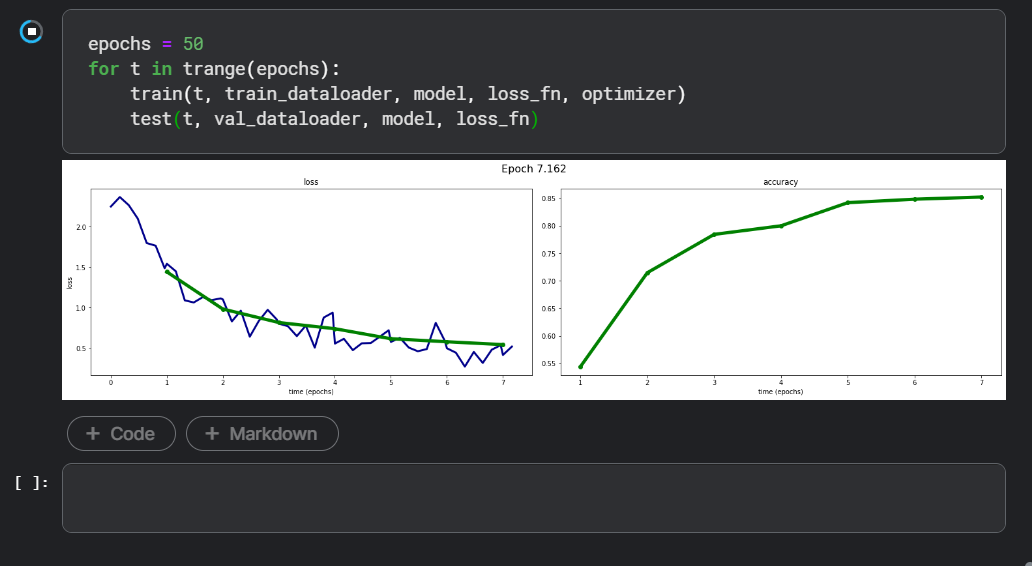

In [54]:
from IPython import display
display.Image("/kaggle/input/cv-val-score/val_score.png")

In [48]:
epochs = 50
for t in trange(epochs):
    train(t, train_dataloader, model, loss_fn, optimizer)
    test(t, val_dataloader, model, loss_fn)

 18%|█▊        | 9/50 [27:22<2:04:42, 182.51s/it]


KeyboardInterrupt: 

In [49]:
test_data = SVHN(
    root=dataset_root,
    is_train=False,
    transform=ToTensor(),
)

In [50]:
test_dataloader = DataLoader(
    test_data, 
    batch_size=batch_size,
)

In [51]:
predictions = []

model.eval()
with torch.no_grad():
    for X, _ in test_dataloader:
        X = Resize(224)(X)
        X = X.to(device)
        pred = model(X).argmax(1).cpu().numpy()
        predictions.extend(list(pred))

In [52]:
def write_solution(filename, labels):
    with open(filename, 'w') as solution:
        print('Id,Category', file=solution)
        for i, label in enumerate(labels):
            print(f'{i},{label}', file=solution)
            
write_solution('solution.csv', predictions)

In [53]:
predictions

[5,
 4,
 1,
 1,
 6,
 2,
 6,
 4,
 4,
 5,
 9,
 1,
 1,
 5,
 2,
 9,
 2,
 1,
 1,
 4,
 7,
 1,
 5,
 5,
 8,
 5,
 6,
 1,
 0,
 1,
 5,
 0,
 4,
 3,
 1,
 2,
 9,
 1,
 3,
 7,
 1,
 5,
 1,
 2,
 6,
 8,
 1,
 5,
 1,
 5,
 9,
 0,
 4,
 3,
 2,
 4,
 7,
 6,
 4,
 3,
 4,
 1,
 5,
 8,
 2,
 5,
 8,
 5,
 7,
 4,
 3,
 2,
 5,
 2,
 2,
 1,
 3,
 1,
 6,
 2,
 2,
 3,
 2,
 6,
 0,
 1,
 3,
 2,
 4,
 0,
 1,
 7,
 1,
 1,
 7,
 6,
 7,
 4,
 0,
 2,
 1,
 8,
 6,
 3,
 6,
 7,
 1,
 3,
 9,
 8,
 1,
 9,
 3,
 5,
 4,
 2,
 1,
 3,
 6,
 5,
 0,
 5,
 8,
 6,
 8,
 5,
 8,
 7,
 1,
 1,
 3,
 1,
 9,
 1,
 9,
 0,
 1,
 8,
 5,
 2,
 2,
 0,
 2,
 1,
 3,
 2,
 7,
 1,
 2,
 2,
 1,
 6,
 1,
 1,
 1,
 6,
 6,
 4,
 2,
 9,
 0,
 1,
 8,
 5,
 3,
 9,
 2,
 8,
 6,
 4,
 9,
 6,
 1,
 2,
 4,
 5,
 7,
 3,
 5,
 9,
 4,
 2,
 1,
 5,
 7,
 2,
 2,
 2,
 6,
 2,
 1,
 4,
 4,
 4,
 6,
 8,
 6,
 1,
 5,
 8,
 4,
 3,
 1,
 4,
 4,
 4,
 3,
 1,
 5,
 6,
 2,
 3,
 2,
 2,
 1,
 4,
 9,
 5,
 2,
 1,
 3,
 4,
 2,
 2,
 0,
 0,
 6,
 3,
 6,
 3,
 1,
 5,
 5,
 5,
 5,
 0,
 3,
 6,
 2,
 2,
 1,
 9,
 2,
 9,
 1,
 9,
 1,
 6,
 7,
 6,
